 **load and read data**

In [ ]:
import pandas as pd
df = pd.read_csv("/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.head())
print(df.info())
print(df.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')


In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)


0


In [ ]:
df.columns = df.columns.str.strip()
df["gender"] = df["gender"].str.lower()


one hot **encoding**

**visualization**

In [ ]:
df = pd.get_dummies(df, columns=["gender", "InternetService", "Contract"], drop_first=True)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-11-a091b9194c87>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="coolwarm")


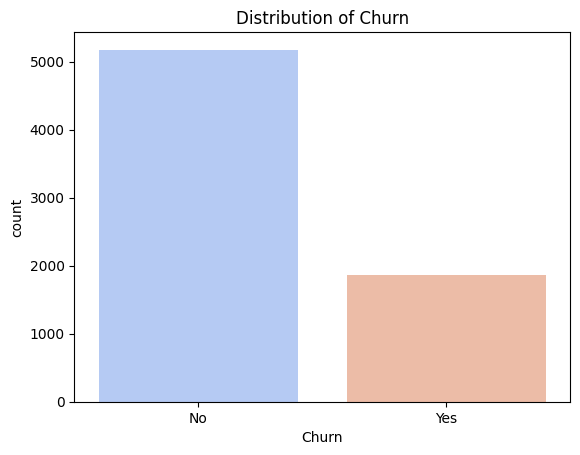

In [ ]:
sns.countplot(x="Churn", data=df, palette="coolwarm")
plt.title("Distribution of Churn")
plt.show()

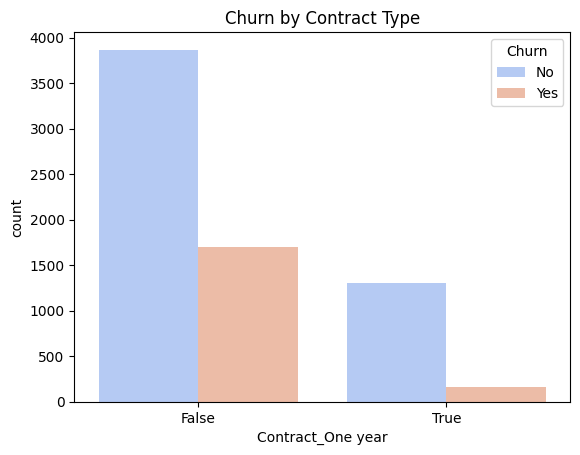

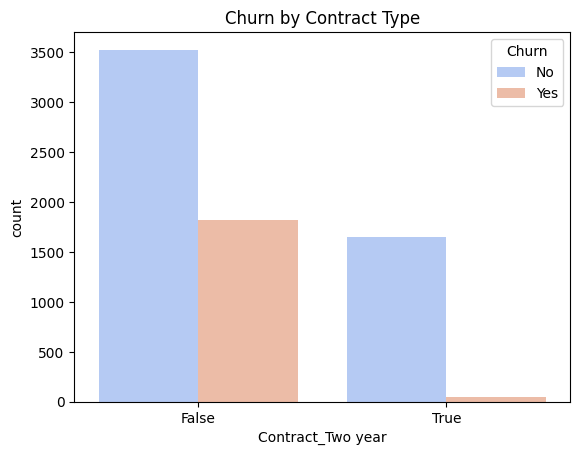

In [ ]:
sns.countplot(x="Contract_One year", hue="Churn", data=df, palette="coolwarm") # Use 'Contract_One year' or another relevant dummy variable column
plt.title("Churn by Contract Type")
plt.show()

sns.countplot(x="Contract_Two year", hue="Churn", data=df, palette="coolwarm") # Use 'Contract_Two year' or another relevant dummy variable column
plt.title("Churn by Contract Type")
plt.show()

<ipython-input-8-57613331f474>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="coolwarm")


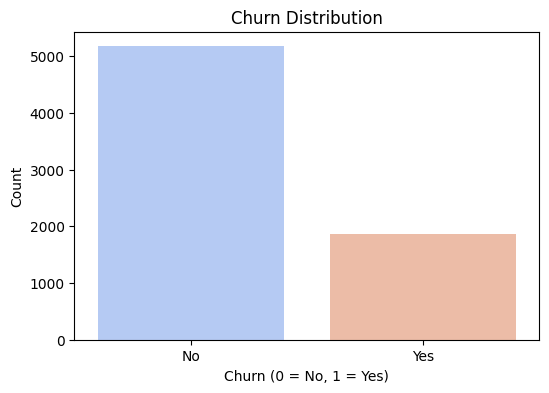

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


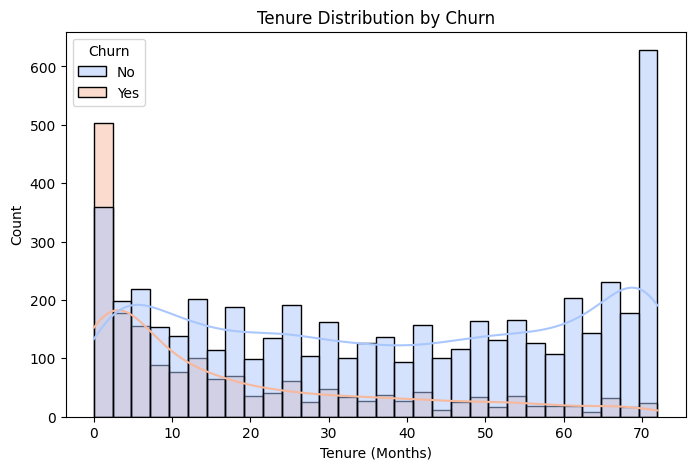

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", kde=True, bins=30, palette="coolwarm")
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()


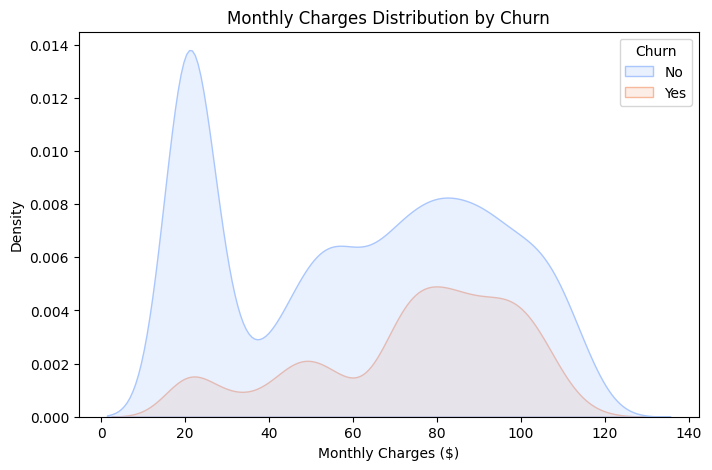

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, palette="coolwarm")
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Density")
plt.show()


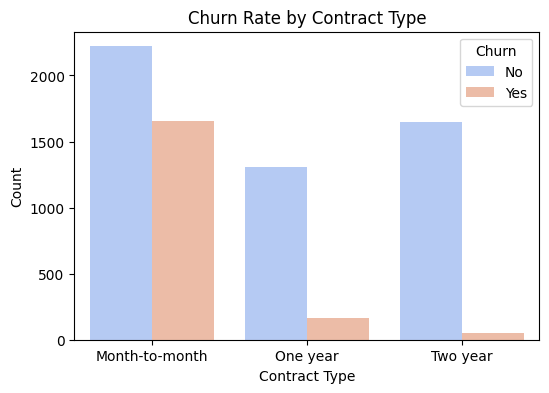

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()


In [ ]:
print(df.columns)


Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_male', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year'],
      dtype='object')


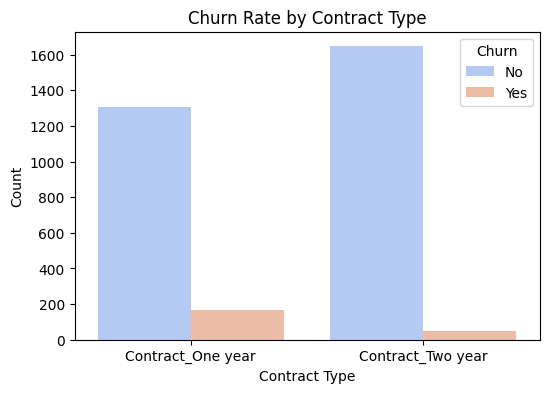

In [ ]:
df_melted = df.melt(id_vars=["Churn"], value_vars=["Contract_One year", "Contract_Two year"],
                     var_name="Contract Type", value_name="Value")

plt.figure(figsize=(6,4))
sns.countplot(x="Contract Type", hue="Churn", data=df_melted[df_melted["Value"] == 1], palette="coolwarm")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()


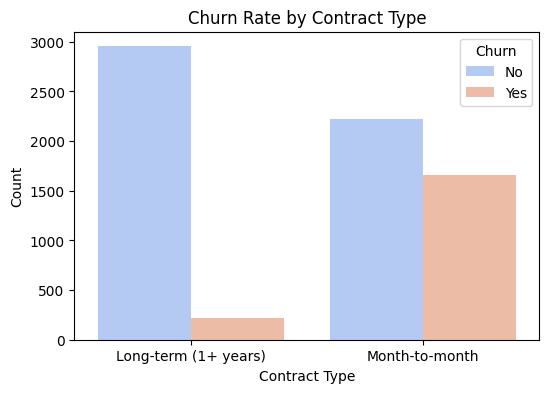

In [ ]:
df["Contract_Month-to-month"] = (df["Contract_One year"] == 0) & (df["Contract_Two year"] == 0)

plt.figure(figsize=(6,4))
sns.countplot(x="Contract_Month-to-month", hue="Churn", data=df, palette="coolwarm")
plt.xticks([0,1], ["Long-term (1+ years)", "Month-to-month"])
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()


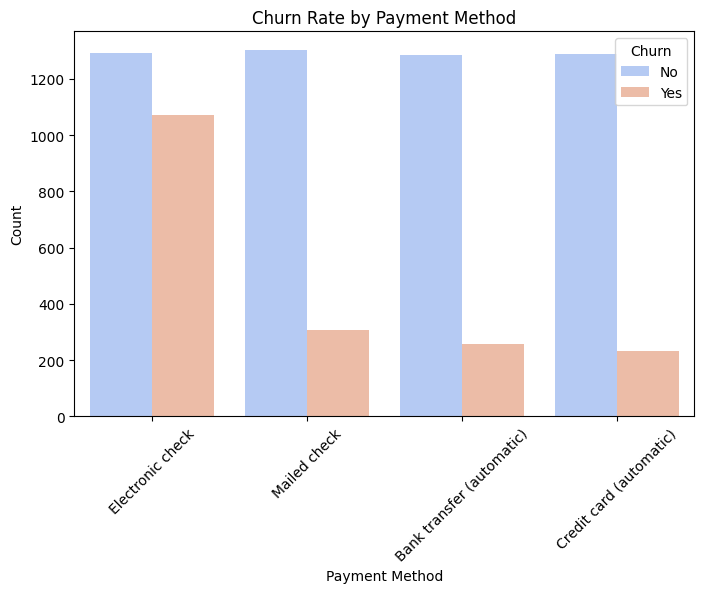

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()


In [ ]:
df_cleaned = df.drop(columns=["customerID"])  # حذف الأعمدة النصية


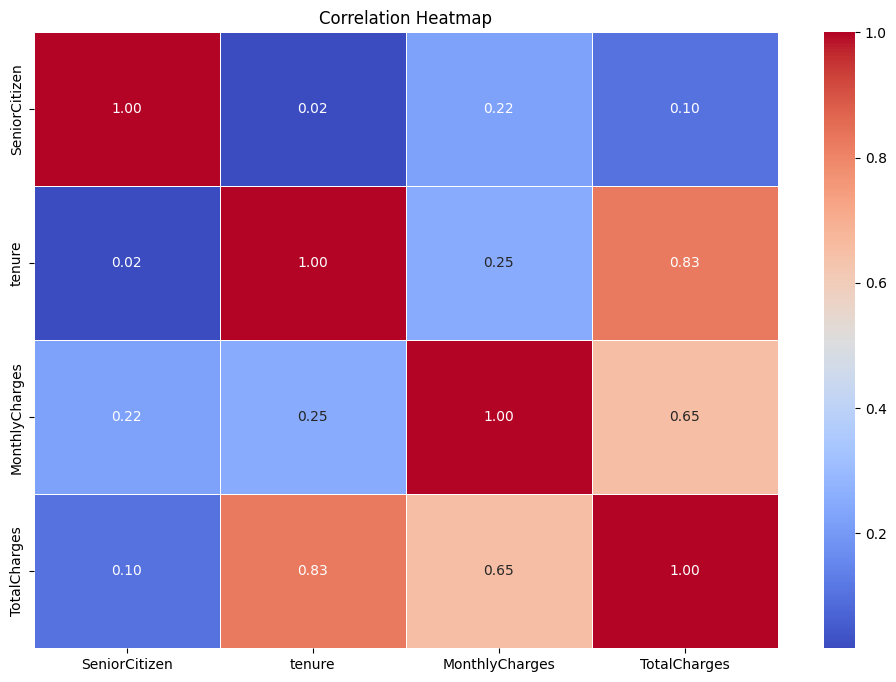

In [ ]:
df_numeric = df.select_dtypes(include=["number"])  # الاحتفاظ بالأعمدة الرقمية فقط

plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Churn", "customerID"])
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


  
**preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()


**Normalization**

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


**One-Hot Encoding**

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])


**ColumnTransformer**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.794180269694819
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1035
         Yes       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [ ]:
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train.loc[X_train.index]  # التأكد من تطابق البيانات
y_test = y_test.loc[X_test.index]


**DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.794889992902768
              precision    recall  f1-score   support

          No       0.86      0.86      0.86      1035
         Yes       0.61      0.61      0.61       374

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409



**RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7916073968705548


**GradientBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8001422475106685


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
model.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7934705464868701
              precision    recall  f1-score   support

          No       0.83      0.90      0.87      1035
         Yes       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
best_kernel = None
best_accuracy = 0
for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    model = SVC(kernel=kernel, C=1.0, gamma="scale", random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy and store it in a variable
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.4f}")
    if accuracy > best_accuracy:  # Compare the calculated accuracy with best_accuracy
        best_accuracy = accuracy
        best_kernel = kernel
print(f"\n🎯 Best Kernel: {best_kernel}, Accuracy: {best_accuracy:.4f}")

Kernel: linear, Accuracy: 0.7921
Kernel: poly, Accuracy: 0.7956
Kernel: rbf, Accuracy: 0.7935
Kernel: sigmoid, Accuracy: 0.7168

🎯 Best Kernel: poly, Accuracy: 0.7956


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.4f}")
best_model = max(results, key=results.get)
print(f"\n🎯 Best Model: {best_model}, Accuracy = {results[best_model]:.4f}")


Logistic Regression: Accuracy = 0.7942
Support Vector Machine: Accuracy = 0.7935
Random Forest: Accuracy = 0.7842

🎯 Best Model: Logistic Regression, Accuracy = 0.7942


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),  # طبقة مخفية 1
    Dropout(0.3),  # لتقليل الـ Overfitting
    Dense(32, activation="relu"),  # طبقة مخفية 2
    Dropout(0.3),
    Dense(1, activation="sigmoid")  # طبقة الإخراج (تصنيف ثنائي)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
X_train_scaled = X_train_scaled.astype("float32")
X_test_scaled = X_test_scaled.astype("float32")
import numpy as np

X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your target variable
label_encoder.fit(y_train)

# Transform your target variables
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# Then proceed to fit your model:
history = model.fit(X_train_scaled, y_train, epochs=48, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/48
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8206 - loss: 0.3945 - val_accuracy: 0.7838 - val_loss: 0.4309
Epoch 2/48
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8276 - loss: 0.3869 - val_accuracy: 0.7845 - val_loss: 0.4318
Epoch 3/48
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8271 - loss: 0.3858 - val_accuracy: 0.7845 - val_loss: 0.4302
Epoch 4/48
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8255 - loss: 0.3854 - val_accuracy: 0.7809 - val_loss: 0.4354
Epoch 5/48
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8338 - loss: 0.3766 - val_accuracy: 0.7817 - val_loss: 0.4323
Epoch 6/48
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8324 - loss: 0.3701 - val_accuracy: 0.7881 - val_loss: 0.4322
Epoch 7/48
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8195 - loss: 0.3933 - val_accuracy: 0.7888 - val_loss: 0.4344
Epoch 8/48
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8272 - loss: 0.3815 - val_accuracy: 0

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = "/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})
df.drop(columns=["customerID"], inplace=True)

X = df.drop(columns=["Churn"])
y = df["Churn"].astype("float32")  # تحويل y لقيم float عشان TensorFlow

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # توحيد الأعمدة

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    keras.layers.Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test))

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\n🎯 Model Accuracy on Test Data: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5484 - loss: 0.8230 - val_accuracy: 0.5905 - val_loss: 0.6585
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7371 - loss: 0.5155 - val_accuracy: 0.7644 - val_loss: 0.5491
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8846 - loss: 0.3116 - val_accuracy: 0.7842 - val_loss: 0.5045
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9355 - loss: 0.2044 - val_accuracy: 0.7679 - val_loss: 0.5020
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9629 - loss: 0.1214 - val_accuracy: 0.7665 - val_loss: 0.5063
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9717 - loss: 0.0899 - val_accuracy: 0.7708 - val_loss: 0.5152
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9772 - loss: 0.0729 - val_accuracy: 0.7771 - val_loss: 0.5108
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9832 - loss: 0.0591 - val_accuracy: 0.7722 

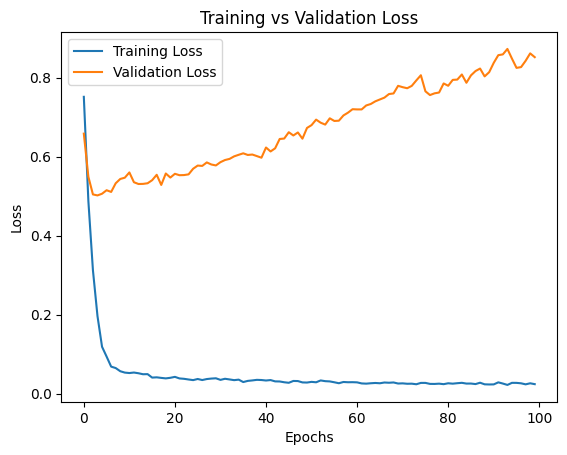

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
